In [18]:
import numpy as np
from torch.utils.data import DataLoader
import yaml
import cv2
from superpoint.data.COCO import COCO
from utils import plot_imgs
import os.path as osp
import matplotlib.pyplot as plt

In [19]:
config_path = osp.realpath(osp.join(osp.abspath('..'), 'configs\\magicpoint_COCO_train.yaml'))

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

config["data"]["augmentation"]["homographic"]["enable"] = False
config["data"]["augmentation"]["photometric"]["enable"] = False

# First Iteration
config["data"]["has_labels"] = 'outputs\coco_export_v1_HA'
dataset = COCO(config["data"], task="training", device="cpu")
data_loader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0, collate_fn=dataset.batch_collator)
data_loader = iter(data_loader)

# Second Iteration
config["data"]["has_labels"] = 'outputs\coco_export_v2_HA'
dataset_2 = COCO(config["data"], task="training", device="cpu")
data_loader_2 = DataLoader(dataset_2, batch_size=1, shuffle=False, num_workers=0, collate_fn=dataset_2.batch_collator)
data_loader_2 = iter(data_loader_2)

In [20]:
def draw_keypoints(img, corners, color=(0, 255, 0), radius=3, s=3):
    img = np.repeat(cv2.resize(img, None, fx=s, fy=s)[..., np.newaxis], 3, -1)
    for c in np.stack(corners).T:
        cv2.circle(img, tuple(s*np.flip(c, 0)), radius, color, thickness=-1)
    return img

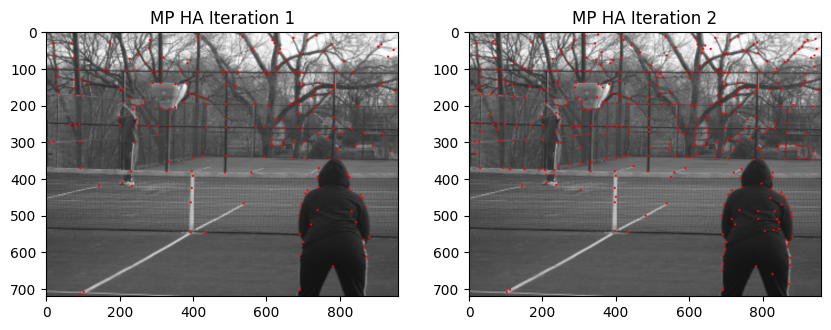

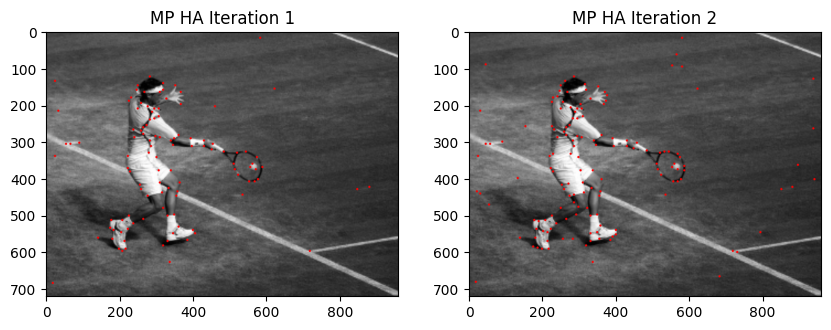

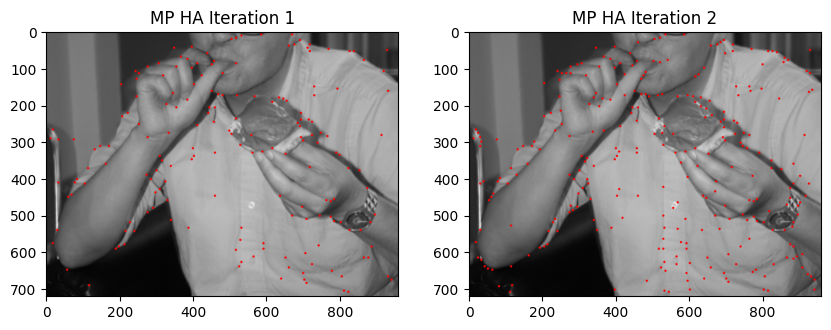

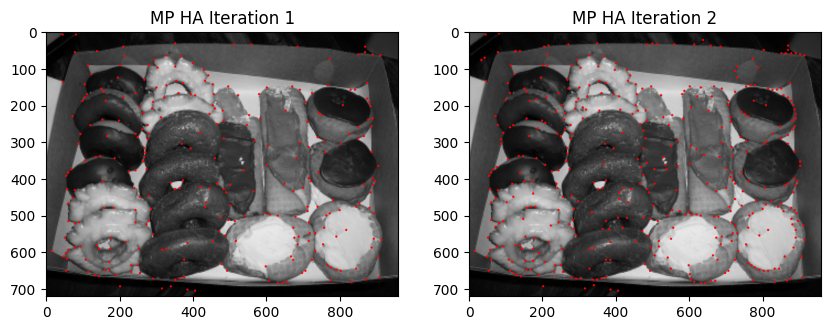

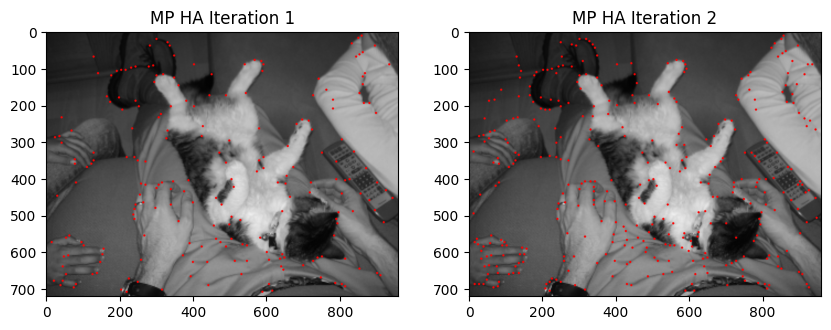

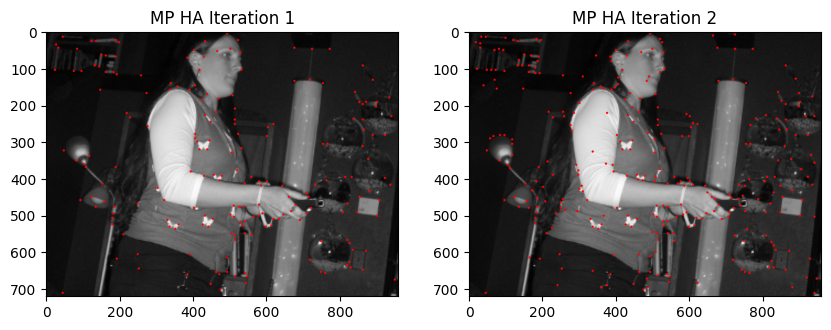

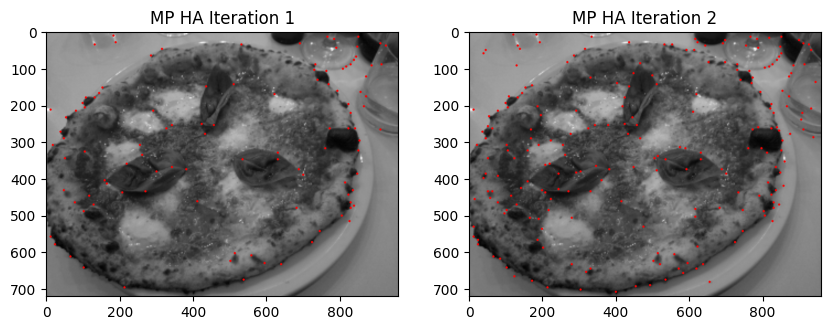

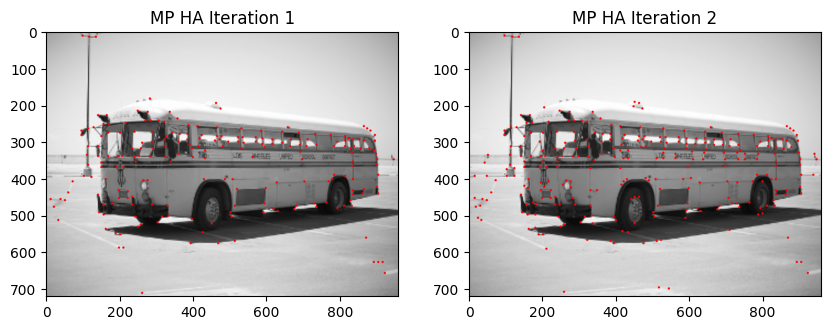

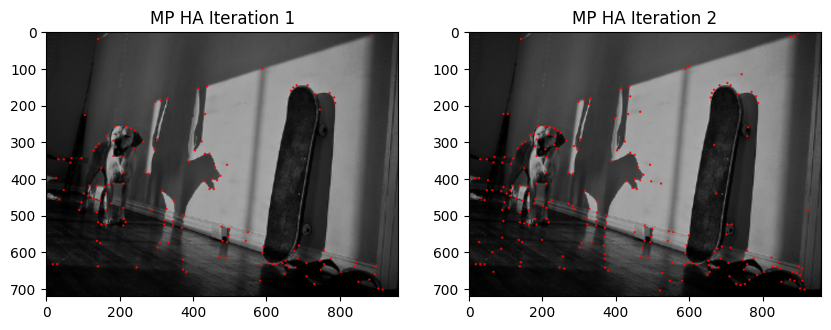

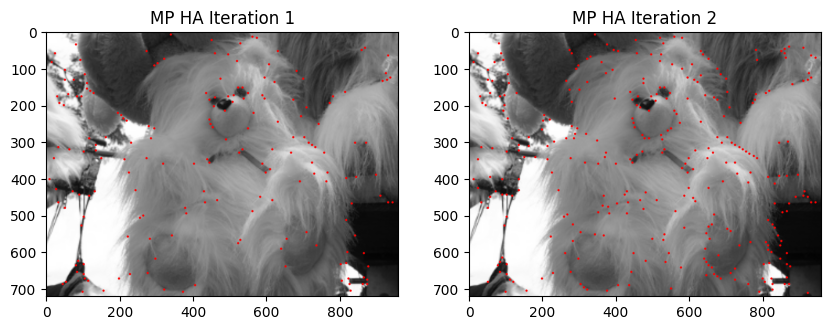

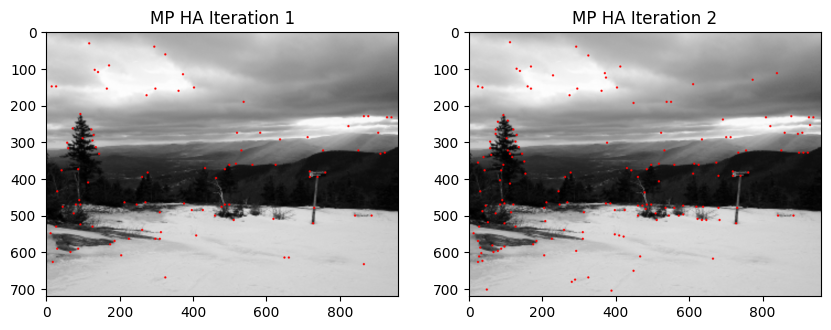

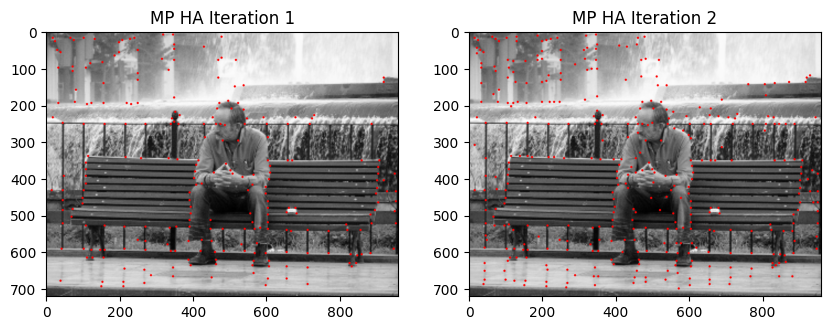

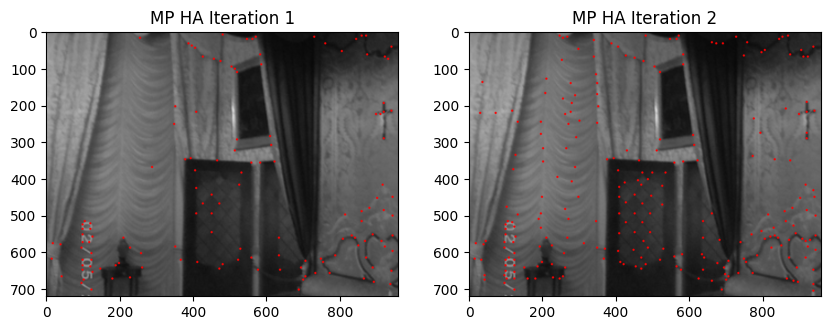

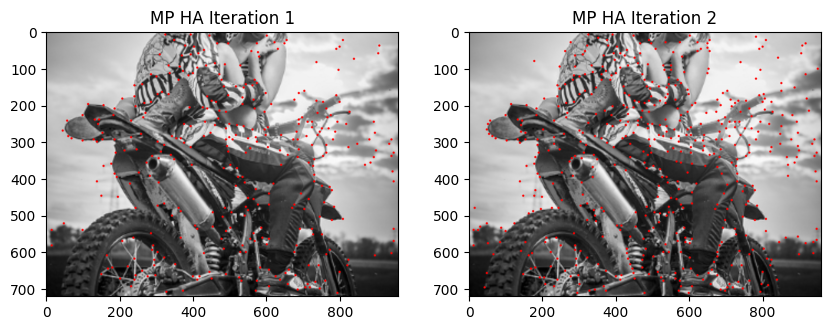

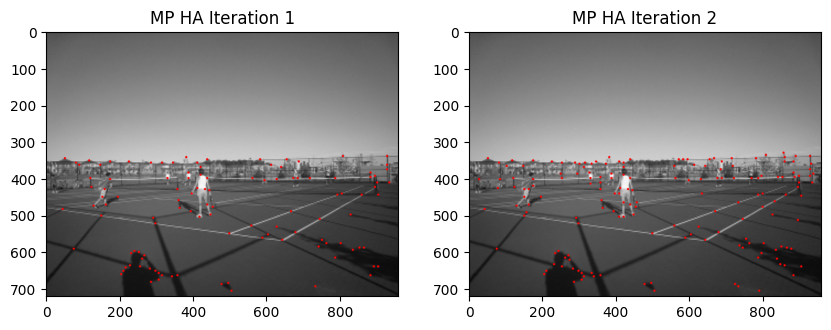

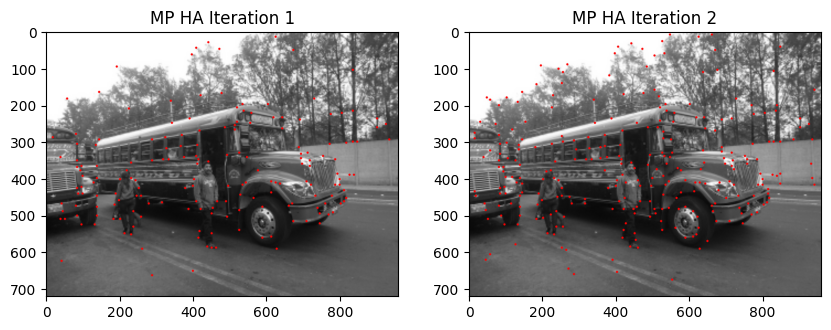

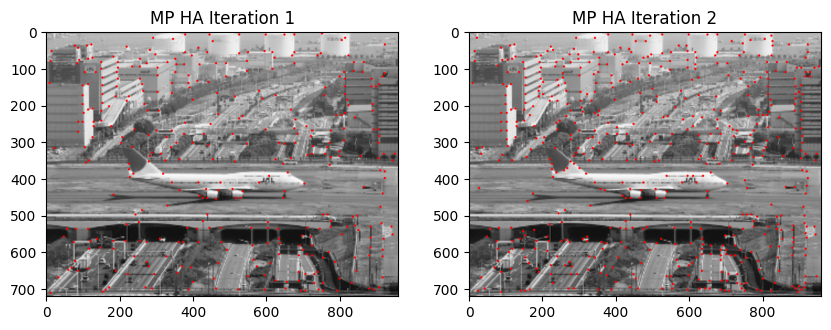

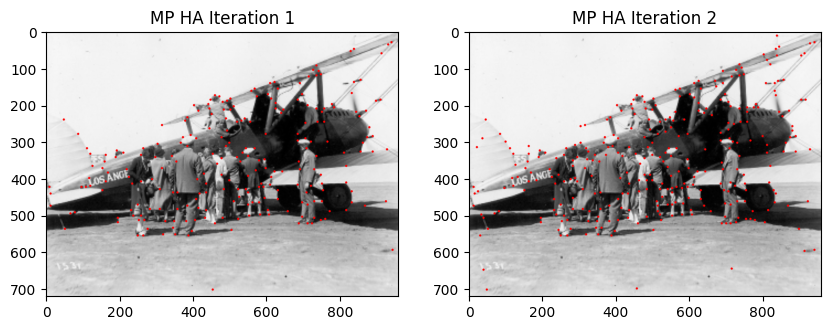

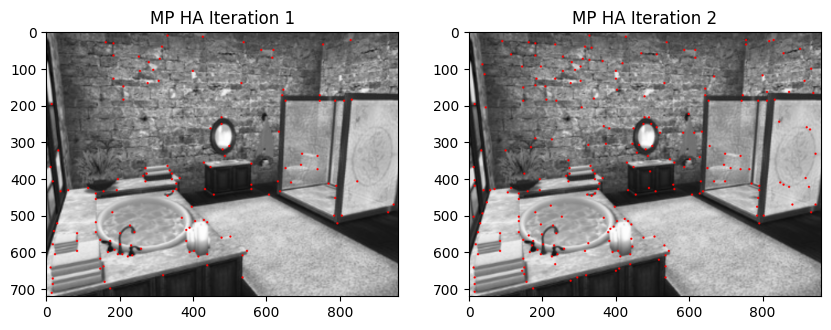

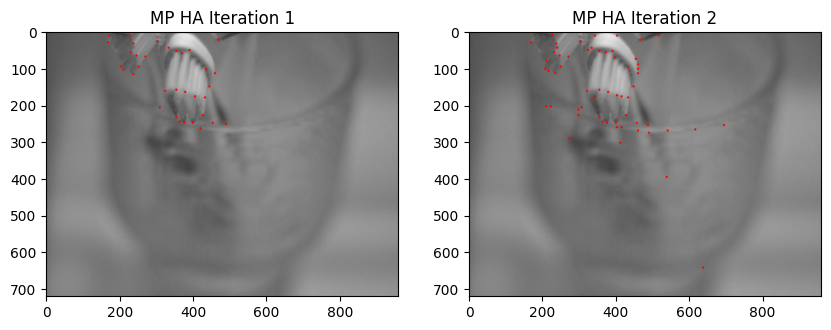

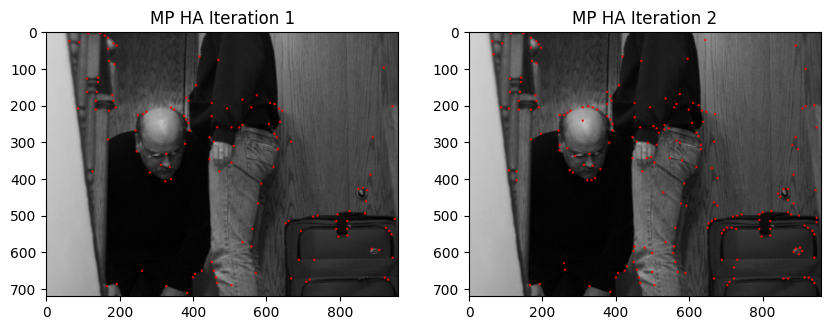

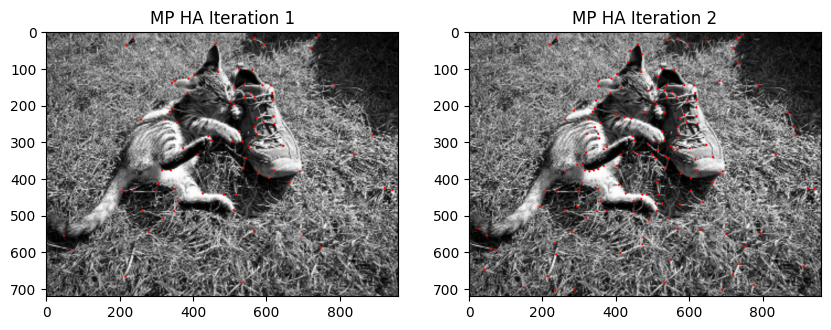

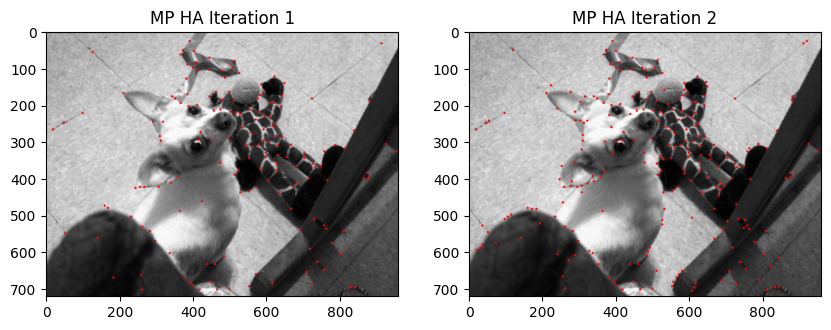

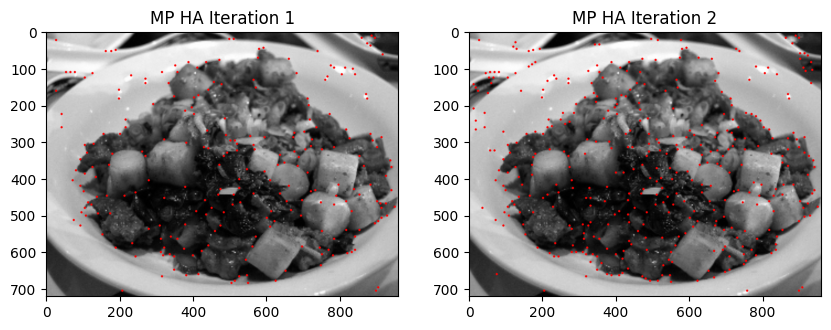

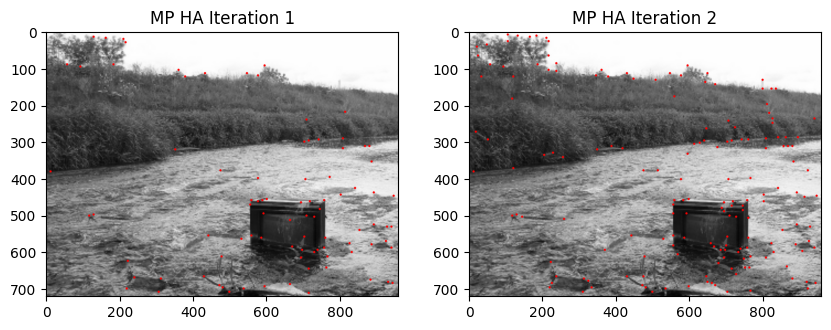

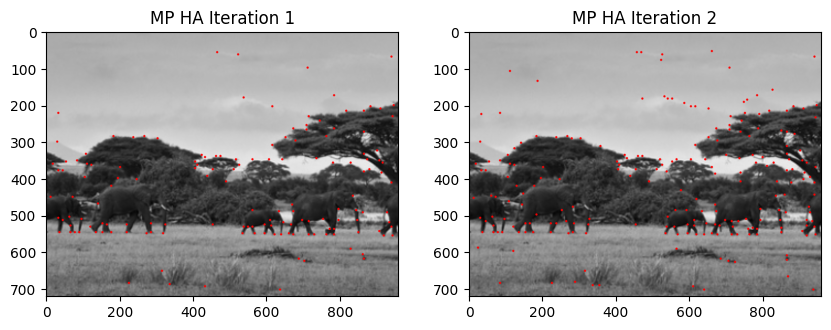

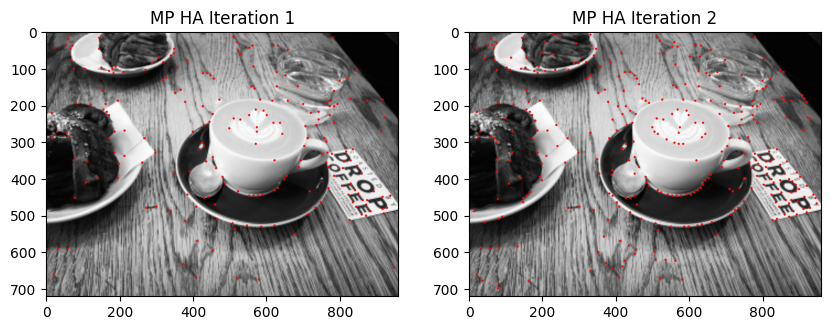

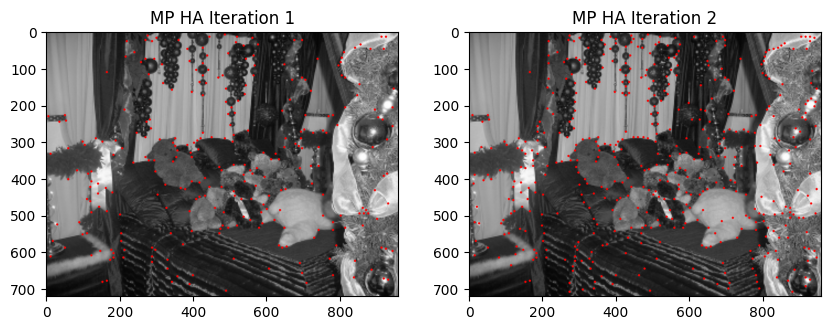

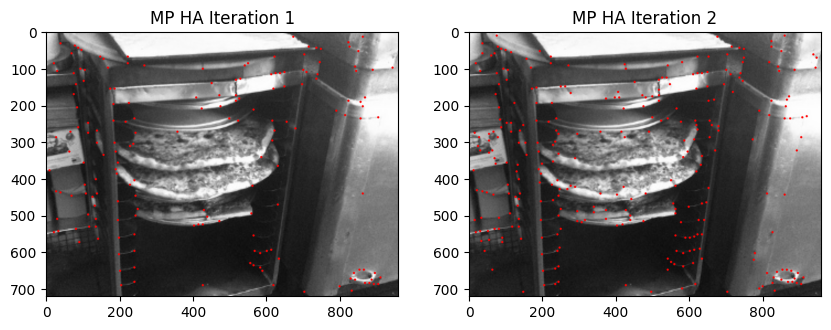

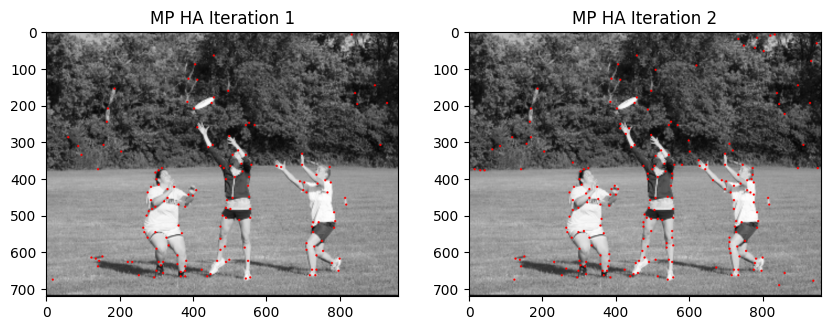

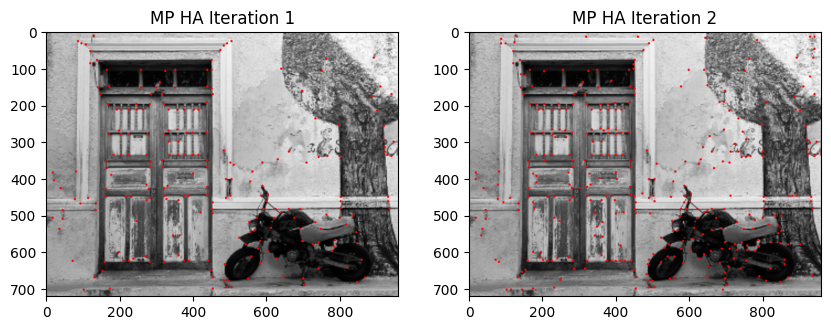

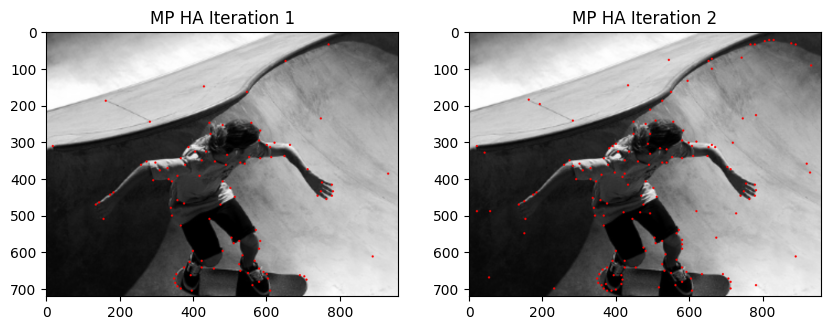

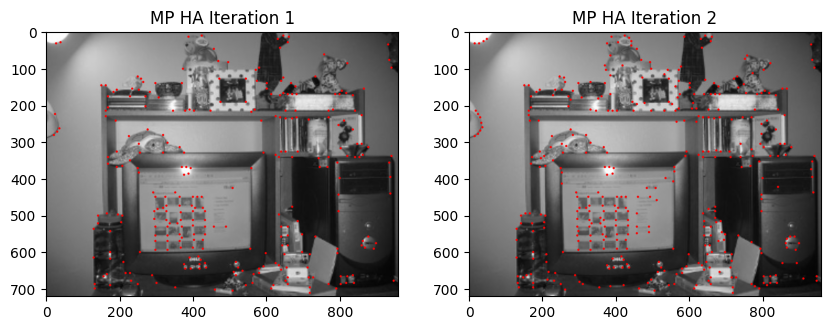

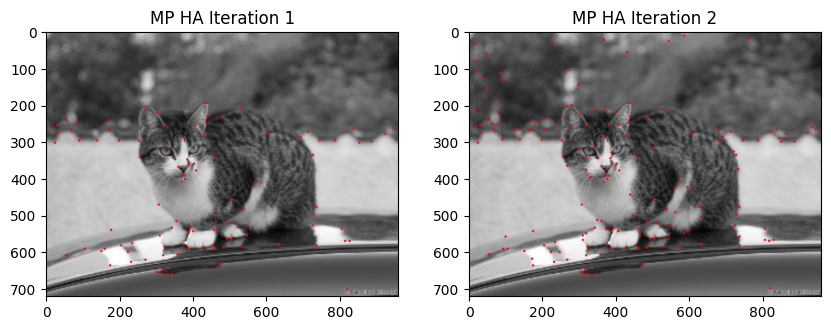

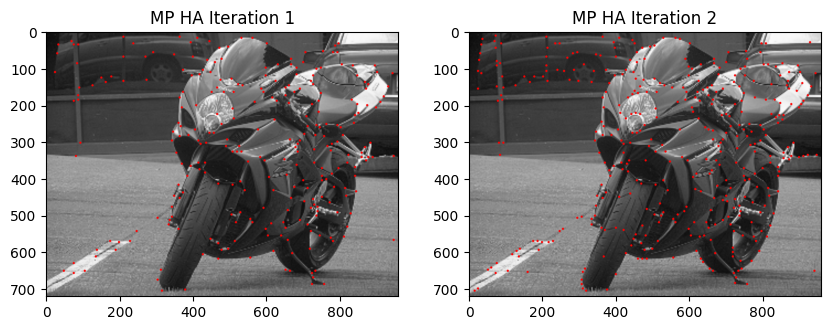

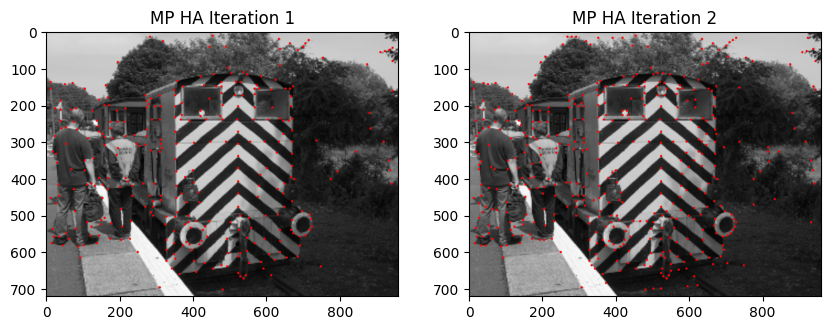

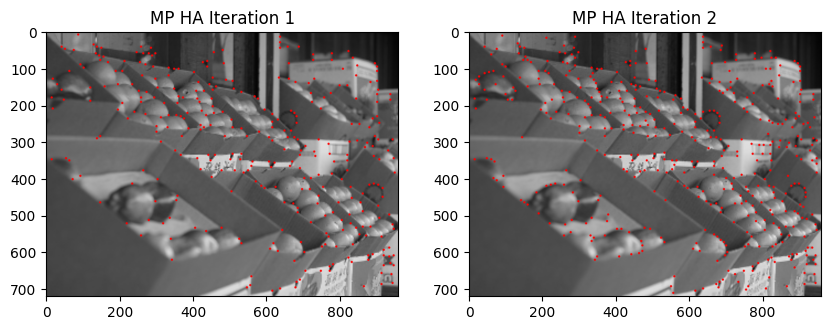

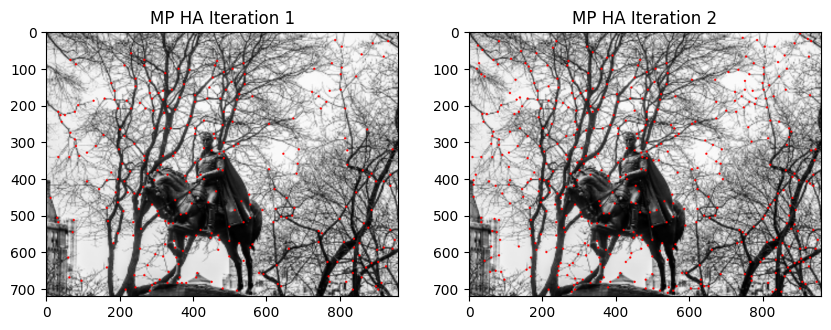

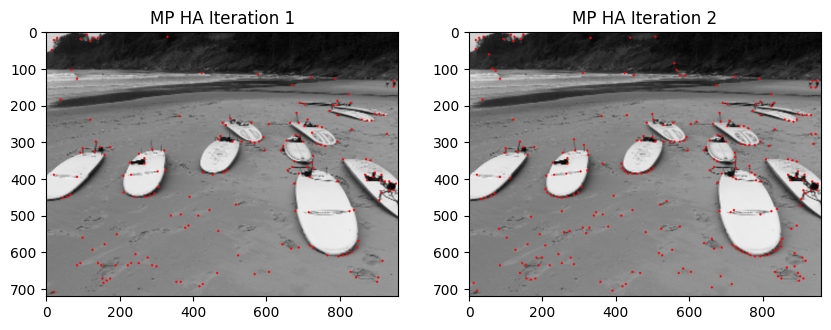

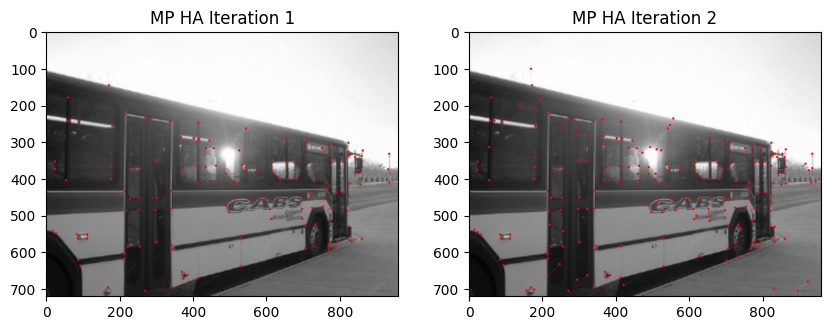

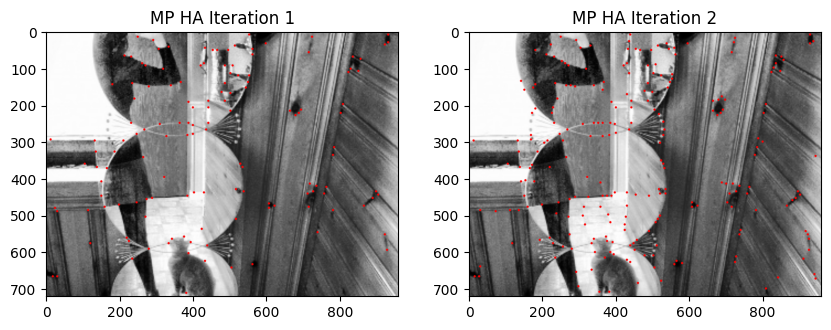

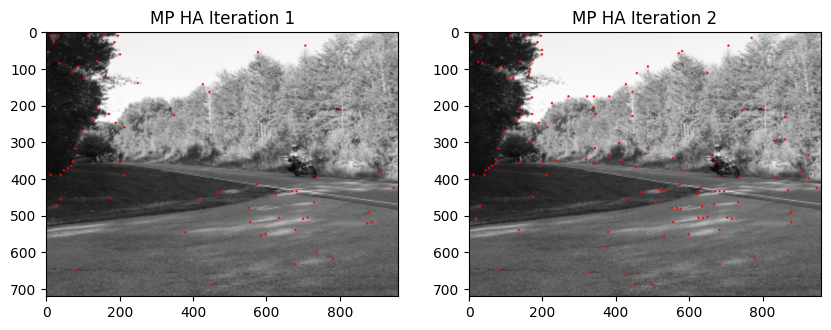

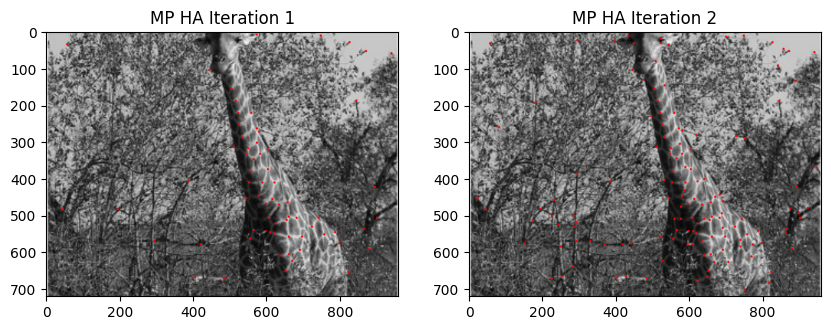

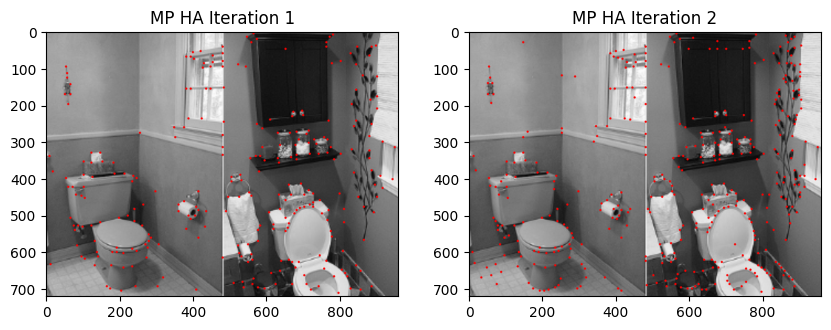

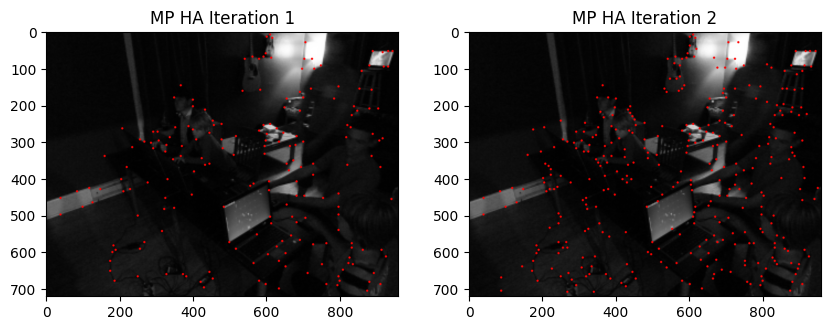

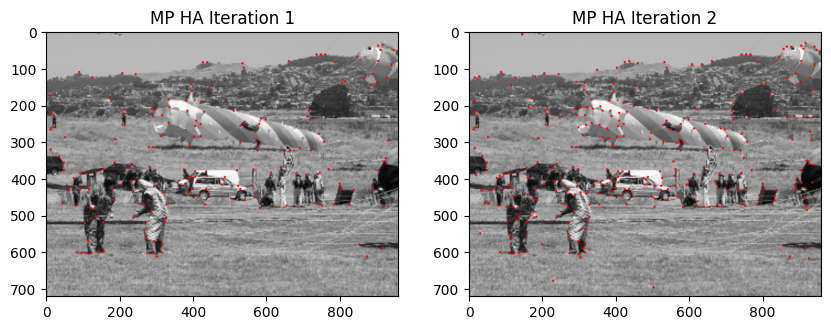

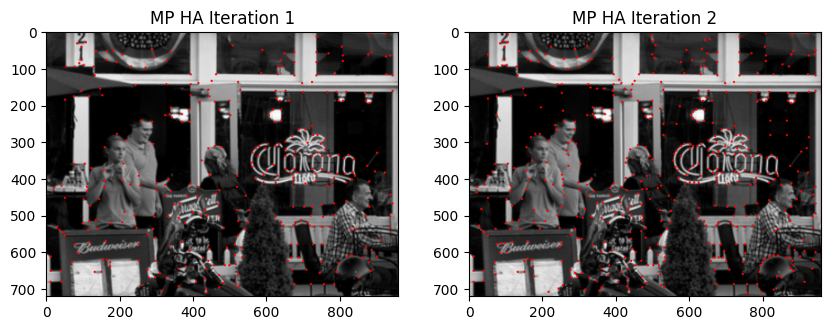

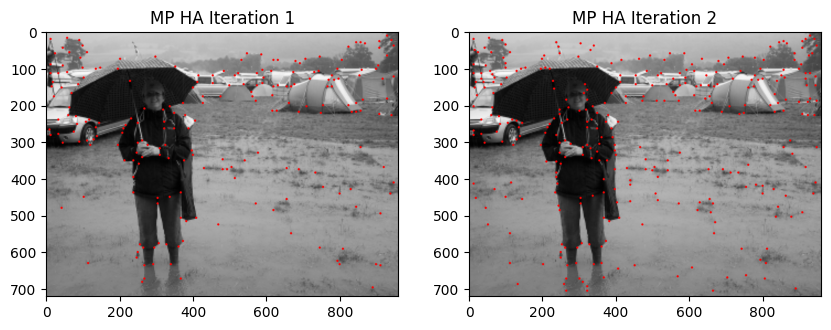

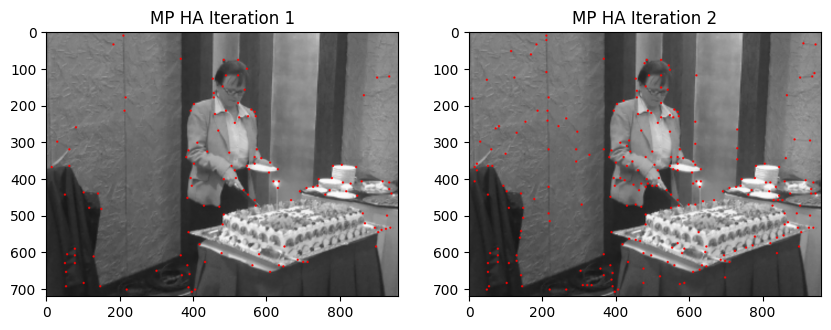

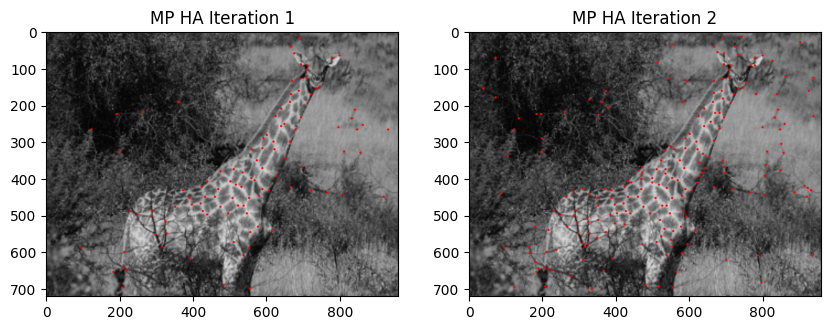

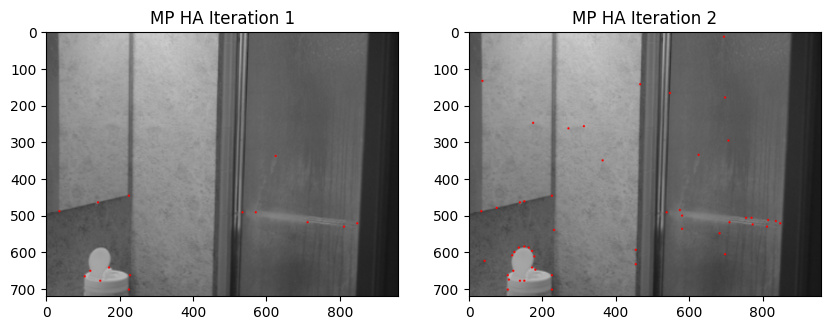

In [22]:
for i, (data_1, data_2) in enumerate(zip(data_loader,data_loader_2)):
    image_1 = data_1["raw"]["image"].squeeze().numpy()
    image_2 = data_2["raw"]["image"].squeeze().numpy()

    keypoints_1 = data_1["raw"]["kpts_heatmap"].squeeze().numpy()
    keypoints_2 = data_2["raw"]["kpts_heatmap"].squeeze().numpy()

    keypoints_1 = np.where(keypoints_1 > 0.015)
    keypoints_2 = np.where(keypoints_2 > 0.015)

    image_1 = draw_keypoints(image_1*255., keypoints_1, color=(255, 0, 0))/255.
    image_2 = draw_keypoints(image_2*255., keypoints_2, color=(255, 0, 0))/255.

    fig, ax = plt.subplots(1,2, figsize=(10,10))
    ax[0].imshow(image_1)
    ax[0].set_title('MP HA Iteration 1')
    ax[1].imshow(image_2)
    ax[1].set_title('MP HA Iteration 2')
    plt.show()
    if i == 50:
        break